## **heart.csv ML Classification**

In [90]:
import pandas as pd
import os

# 데이터 불러오기
file_name = 'heart.csv'
full_file_path = os.path.join(os.getcwd() + "\\" + file_name)
df = pd.read_csv(full_file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
# 결측치 확인
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [92]:
# 레이블 확인
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

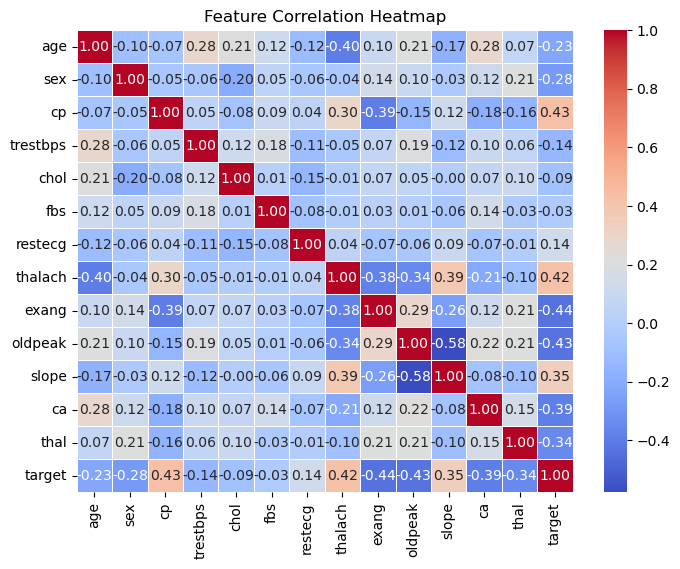

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 간 상관관계(레이블 데이터 제외)
correlation_matrix = df.corr()

# 시각화
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# 피처, 레이블 데이터 나누기
X = df.drop('target', axis = 1).values
y = df['target'].values

# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
# 훈련, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [8]:
# 모델 생성
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression(max_iter = 200)
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [9]:
# 결정트리 학습 / 예측 / 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리 정확도 {:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('결정트리 오차행렬')
print(confusion_matrix(y_test, dt_pred))

결정트리 정확도 0.8033
결정트리 오차행렬
[[25  4]
 [ 8 24]]


In [10]:
# 랜덤포레스트 학습 / 예측 / 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트 정확도 {:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('랜덤포레스트 오차행렬')
print(confusion_matrix(y_test, rf_pred))

랜덤포레스트 정확도 0.8852
랜덤포레스트 오차행렬
[[25  4]
 [ 3 29]]


In [11]:
# 로지스틱 회귀 학습 / 예측 / 평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 회귀 정확도 {:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('로지스틱 회귀 오차행렬')
print(confusion_matrix(y_test, lr_pred))

로지스틱 회귀 정확도 0.8525
로지스틱 회귀 오차행렬
[[25  4]
 [ 5 27]]


In [12]:
# KNN 학습 / 예측 / 평가
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
print('KNN 정확도 {:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('KNN 오차행렬')
print(confusion_matrix(y_test, knn_pred))

KNN 정확도 0.8689
KNN 오차행렬
[[27  2]
 [ 6 26]]


## **heart.csv DL Classification**

In [13]:
# 원핫 인코딩
Y = pd.get_dummies(y).values
Y

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

In [14]:
X 

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((242, 13), (61, 13), (242, 2), (61, 2))

In [85]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 입력층 및 은닉층 추가
model.add(Dense(256, input_shape = (13, ), activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation='relu'))

# 출력층 (이진 분류라면 units = 1, 다중 이진 분류라면 units = 2)
model.add(Dense(2, activation = 'sigmoid'))  # 이진 분류

# 모델 컴파일 (학습률 설정 방식 수정)
model.compile(optimizer = Adam(learning_rate = 0.04), loss = 'binary_crossentropy', metrics = ['accuracy'])

# 모델 요약 정보 출력
model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,042 (465.01 KB)

 Trainable params: 119,042 (465.01 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
import numpy as np

model_history = model.fit(x = X_train, y = y_train, epochs = 30, batch_size = 32, validation_split = 0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5756 - loss: 5.9414 - val_accuracy: 0.4400 - val_loss: 0.5590
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6238 - loss: 0.5994 - val_accuracy: 0.9200 - val_loss: 0.4050
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7856 - loss: 0.5996 - val_accuracy: 0.8800 - val_loss: 0.2916
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8376 - loss: 0.3652 - val_accuracy: 0.9200 - val_loss: 0.2804
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8726 - loss: 0.3222 - val_accuracy: 0.9200 - val_loss: 0.2346
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8668 - loss: 0.2801 - val_accuracy: 0.9200 - val_loss: 0.2388
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8819 - loss: 0.2719 - val_accuracy: 0.8800 - val_loss: 0.2281
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9151 - loss: 0.3283 - val_accuracy: 0.8800 - val_loss: 0.2549
Epoch

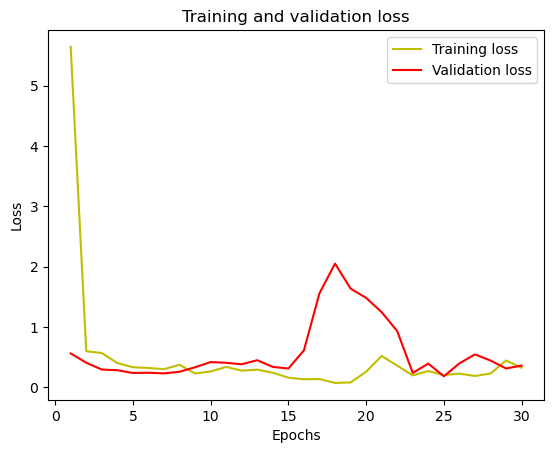

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

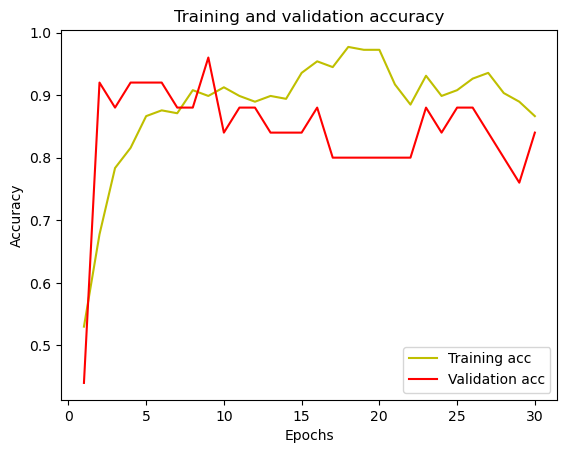

In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

# Accuracy of the predicted values
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[22  5]
 [ 4 30]]


### **딥러닝 회귀**

In [25]:
import pandas as pd
import os

# 데이터 불러오기
file_name = 'diabetes.csv'
full_file_path = os.path.join(os.getcwd() + "\\" + file_name)
df = pd.read_csv(full_file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# 기존 레이블인 Outcome 제거
df = df.drop('Outcome', axis = 1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
# 피처, 레이블 데이터
X = df.drop('BMI', axis = 1).values
y = df['BMI'].values

In [28]:
# 원핫 인코딩
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 7), (154, 7), (614, 248), (154, 248))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 입력층 및 은닉층 추가
model.add(Dense(64, input_shape = (7,), activation = 'relu'))  
model.add(Dense(32, activation = 'relu'))  
model.add(Dense(16, activation = 'relu'))  

# 출력층 (활성화 함수 없음 → 회귀 모델)
model.add(Dense(1))  

# 모델 컴파일 (회귀용 손실 함수 및 학습률 조정)
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'mean_squared_error', metrics = ['mae'])

# 모델 요약 정보 출력
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
N_EPOCHS = 10

history = model.fit(x = X_train, y = y_train, epochs = N_EPOCHS, batch_size = 32, validation_split = 0.1)
y_pred = model.predict(X_test)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 24.8905 - mae: 3.6995 - val_loss: 6.9364 - val_mae: 2.1169
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5565 - mae: 1.6144 - val_loss: 2.2237 - val_mae: 1.1637
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7118 - mae: 1.0006 - val_loss: 0.6874 - val_mae: 0.6514
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6959 - mae: 0.6077 - val_loss: 0.4360 - val_mae: 0.4603
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3153 - mae: 0.3716 - val_loss: 0.2878 - val_mae: 0.3790
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1865 - mae: 0.2927 - val_loss: 0.2561 - val_mae: 0.3314
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1906 - mae: 0.2683 - val_loss: 0.1907 - val_mae: 0.3103
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1392 - mae: 0.2454 - val_loss: 0.2214 - val_mae: 0.3381
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1338 - mae:

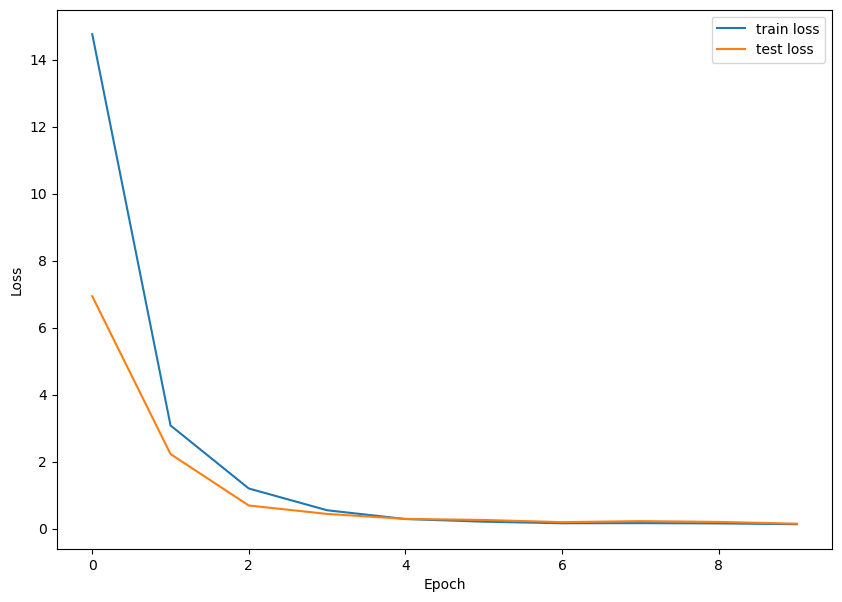

In [39]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1148 - mae: 0.2230 


[0.1253194361925125, 0.23041720688343048]